<a href="https://colab.research.google.com/github/RoshanMaharjan7/Concepts-and-Technologies-of-AI/blob/main/2408424_Roshan_Maharjan_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Roshan Maharjan\
Student ID: 2408424

#Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# For preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectFromModel

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#Data Reading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts of AI/Final Assesment/Regression/digital_literacy_dataset.csv")

#Exploratory Data Analysis Statistical Interpretation and Visualizations.

In [ ]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3
5,U0006,57,Female,High School,Self-Employed,Low,Rural,15,3,46,...,12,29.85,66,25,Low,87,2,75,No,47.4
6,U0007,46,Other,Secondary,Unemployed,Low,Semi-Rural,35,34,49,...,6,24.54,61,23,Medium,79,3,93,No,78.3
7,U0008,36,Male,High School,Unemployed,Low,Rural,19,48,46,...,10,24.12,86,22,Low,81,5,70,Yes,59.4
8,U0009,64,Male,High School,Other,Low,Rural,33,10,37,...,7,15.68,65,24,Medium,78,2,75,No,63.3
9,U0010,61,Female,High School,Self-Employed,Medium,Rural,50,18,20,...,14,12.19,80,17,Low,64,3,95,Yes,60.2


In [ ]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1000
Number of columns: 23


In [ ]:
print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
User_ID                                          object
Age                                               int64
Gender                                           object
Education_Level                                  object
Employment_Status                                object
Household_Income                                 object
Location_Type                                    object
Basic_Computer_Knowledge_Score                    int64
Internet_Usage_Score                              int64
Mobile_Literacy_Score                             int64
Post_Training_Basic_Computer_Knowledge_Score      int64
Post_Training_Internet_Usage_Score                int64
Post_Training_Mobile_Literacy_Score               int64
Modules_Completed                                 int64
Average_Time_Per_Module                         float64
Quiz_Performance                                  int64
Session_Count                                     int64
Engagement_Level     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [ ]:
df = df.drop('User_ID', axis=1)
df

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,54,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,60,Female,High School,Farmer,Low,Rural,22,14,35,52,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,46,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,34,Female,Secondary,Farmer,Low,Rural,6,32,17,36,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,50,Male,High School,Other,Medium,Rural,14,41,19,44,...,8,16.65,76,10,Medium,90,4,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,Female,Primary,Unemployed,Low,Rural,18,49,27,62,...,15,28.28,61,20,Low,98,4,85,No,73.1
996,30,Female,Secondary,Student,Medium,Rural,25,24,24,50,...,13,14.06,73,26,Medium,74,2,76,No,60.5
997,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,71,...,7,29.91,65,14,Low,66,1,86,Yes,63.8
998,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,69,...,12,28.34,91,21,High,83,4,73,Yes,60.0


###Checking for null values and Duplicate values

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education_Level,212
Employment_Status,0
Household_Income,0
Location_Type,0
Basic_Computer_Knowledge_Score,0
Internet_Usage_Score,0
Mobile_Literacy_Score,0
Post_Training_Basic_Computer_Knowledge_Score,0


In [ ]:
df.drop_duplicates(inplace=True);

# Handle missing values in Education_Level
mode_value = df['Education_Level'].mode()[0]
df['Education_Level'].fillna(mode_value, inplace=True)

print(df.isnull().sum())
print(df.info())

Age                                             0
Gender                                          0
Education_Level                                 0
Employment_Status                               0
Household_Income                                0
Location_Type                                   0
Basic_Computer_Knowledge_Score                  0
Internet_Usage_Score                            0
Mobile_Literacy_Score                           0
Post_Training_Basic_Computer_Knowledge_Score    0
Post_Training_Internet_Usage_Score              0
Post_Training_Mobile_Literacy_Score             0
Modules_Completed                               0
Average_Time_Per_Module                         0
Quiz_Performance                                0
Session_Count                                   0
Engagement_Level                                0
Adaptability_Score                              0
Feedback_Rating                                 0
Skill_Application                               0


<ipython-input-9-c025ea7a2da9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].fillna(mode_value, inplace=True)


In [ ]:
df.describe()

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Skill_Application,Overall_Literacy_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,74.840000,2.998000,75.565000,60.23040
std,13.573568,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,14.446907,1.407827,14.852487,10.29046
min,18.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,50.000000,1.000000,50.000000,32.40000
25%,29.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,63.000000,2.000000,63.000000,53.27500
50%,41.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,75.000000,3.000000,75.000000,60.30000
75%,52.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,87.000000,4.000000,88.000000,67.12500
max,64.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,100.000000,5.000000,100.000000,89.90000


###Outliers Detection

In [ ]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Drop missing values before calculating quantiles
        column_data = df[column].dropna()

        # Calculate Q1, Q3, and IQR
        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1

        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts


outliers = count_outliers(df)
print(outliers)

{'Age': 0, 'Basic_Computer_Knowledge_Score': 0, 'Internet_Usage_Score': 0, 'Mobile_Literacy_Score': 0, 'Post_Training_Basic_Computer_Knowledge_Score': 0, 'Post_Training_Internet_Usage_Score': 0, 'Post_Training_Mobile_Literacy_Score': 0, 'Modules_Completed': 0, 'Average_Time_Per_Module': 0, 'Quiz_Performance': 0, 'Session_Count': 0, 'Adaptability_Score': 0, 'Feedback_Rating': 0, 'Skill_Application': 0, 'Overall_Literacy_Score': 3}


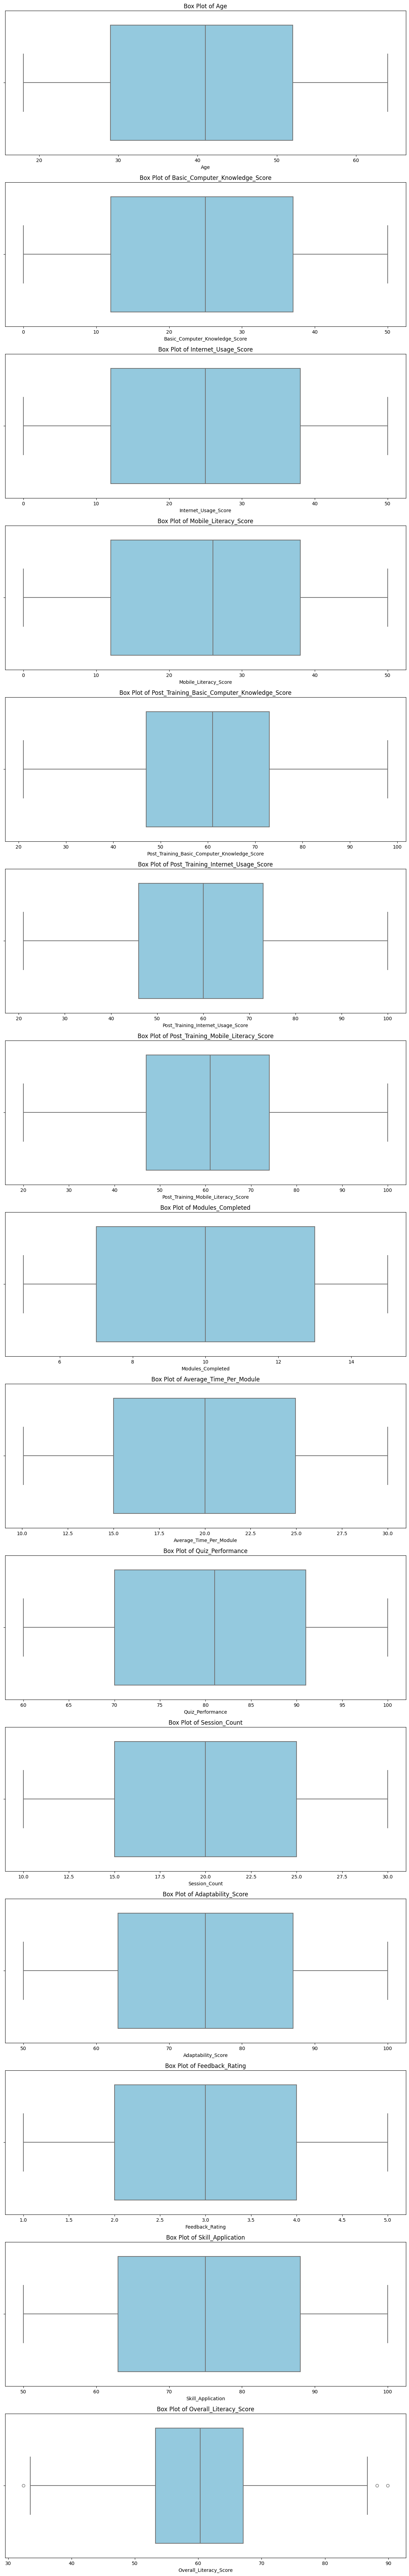

In [ ]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create subplots for each numerical column
num_columns = len(numerical_columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, num_columns * 5))

# Loop through each numerical column and plot its boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color='skyblue', linewidth=1.5)
    axes[i].set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df):
    df_filtered = df.copy()

    for column in df_filtered.select_dtypes(include=['number']).columns:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter rows within bounds
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

# Remove outliers
df = remove_outliers_iqr(df)
print(df.shape)

(997, 22)


##Visualization

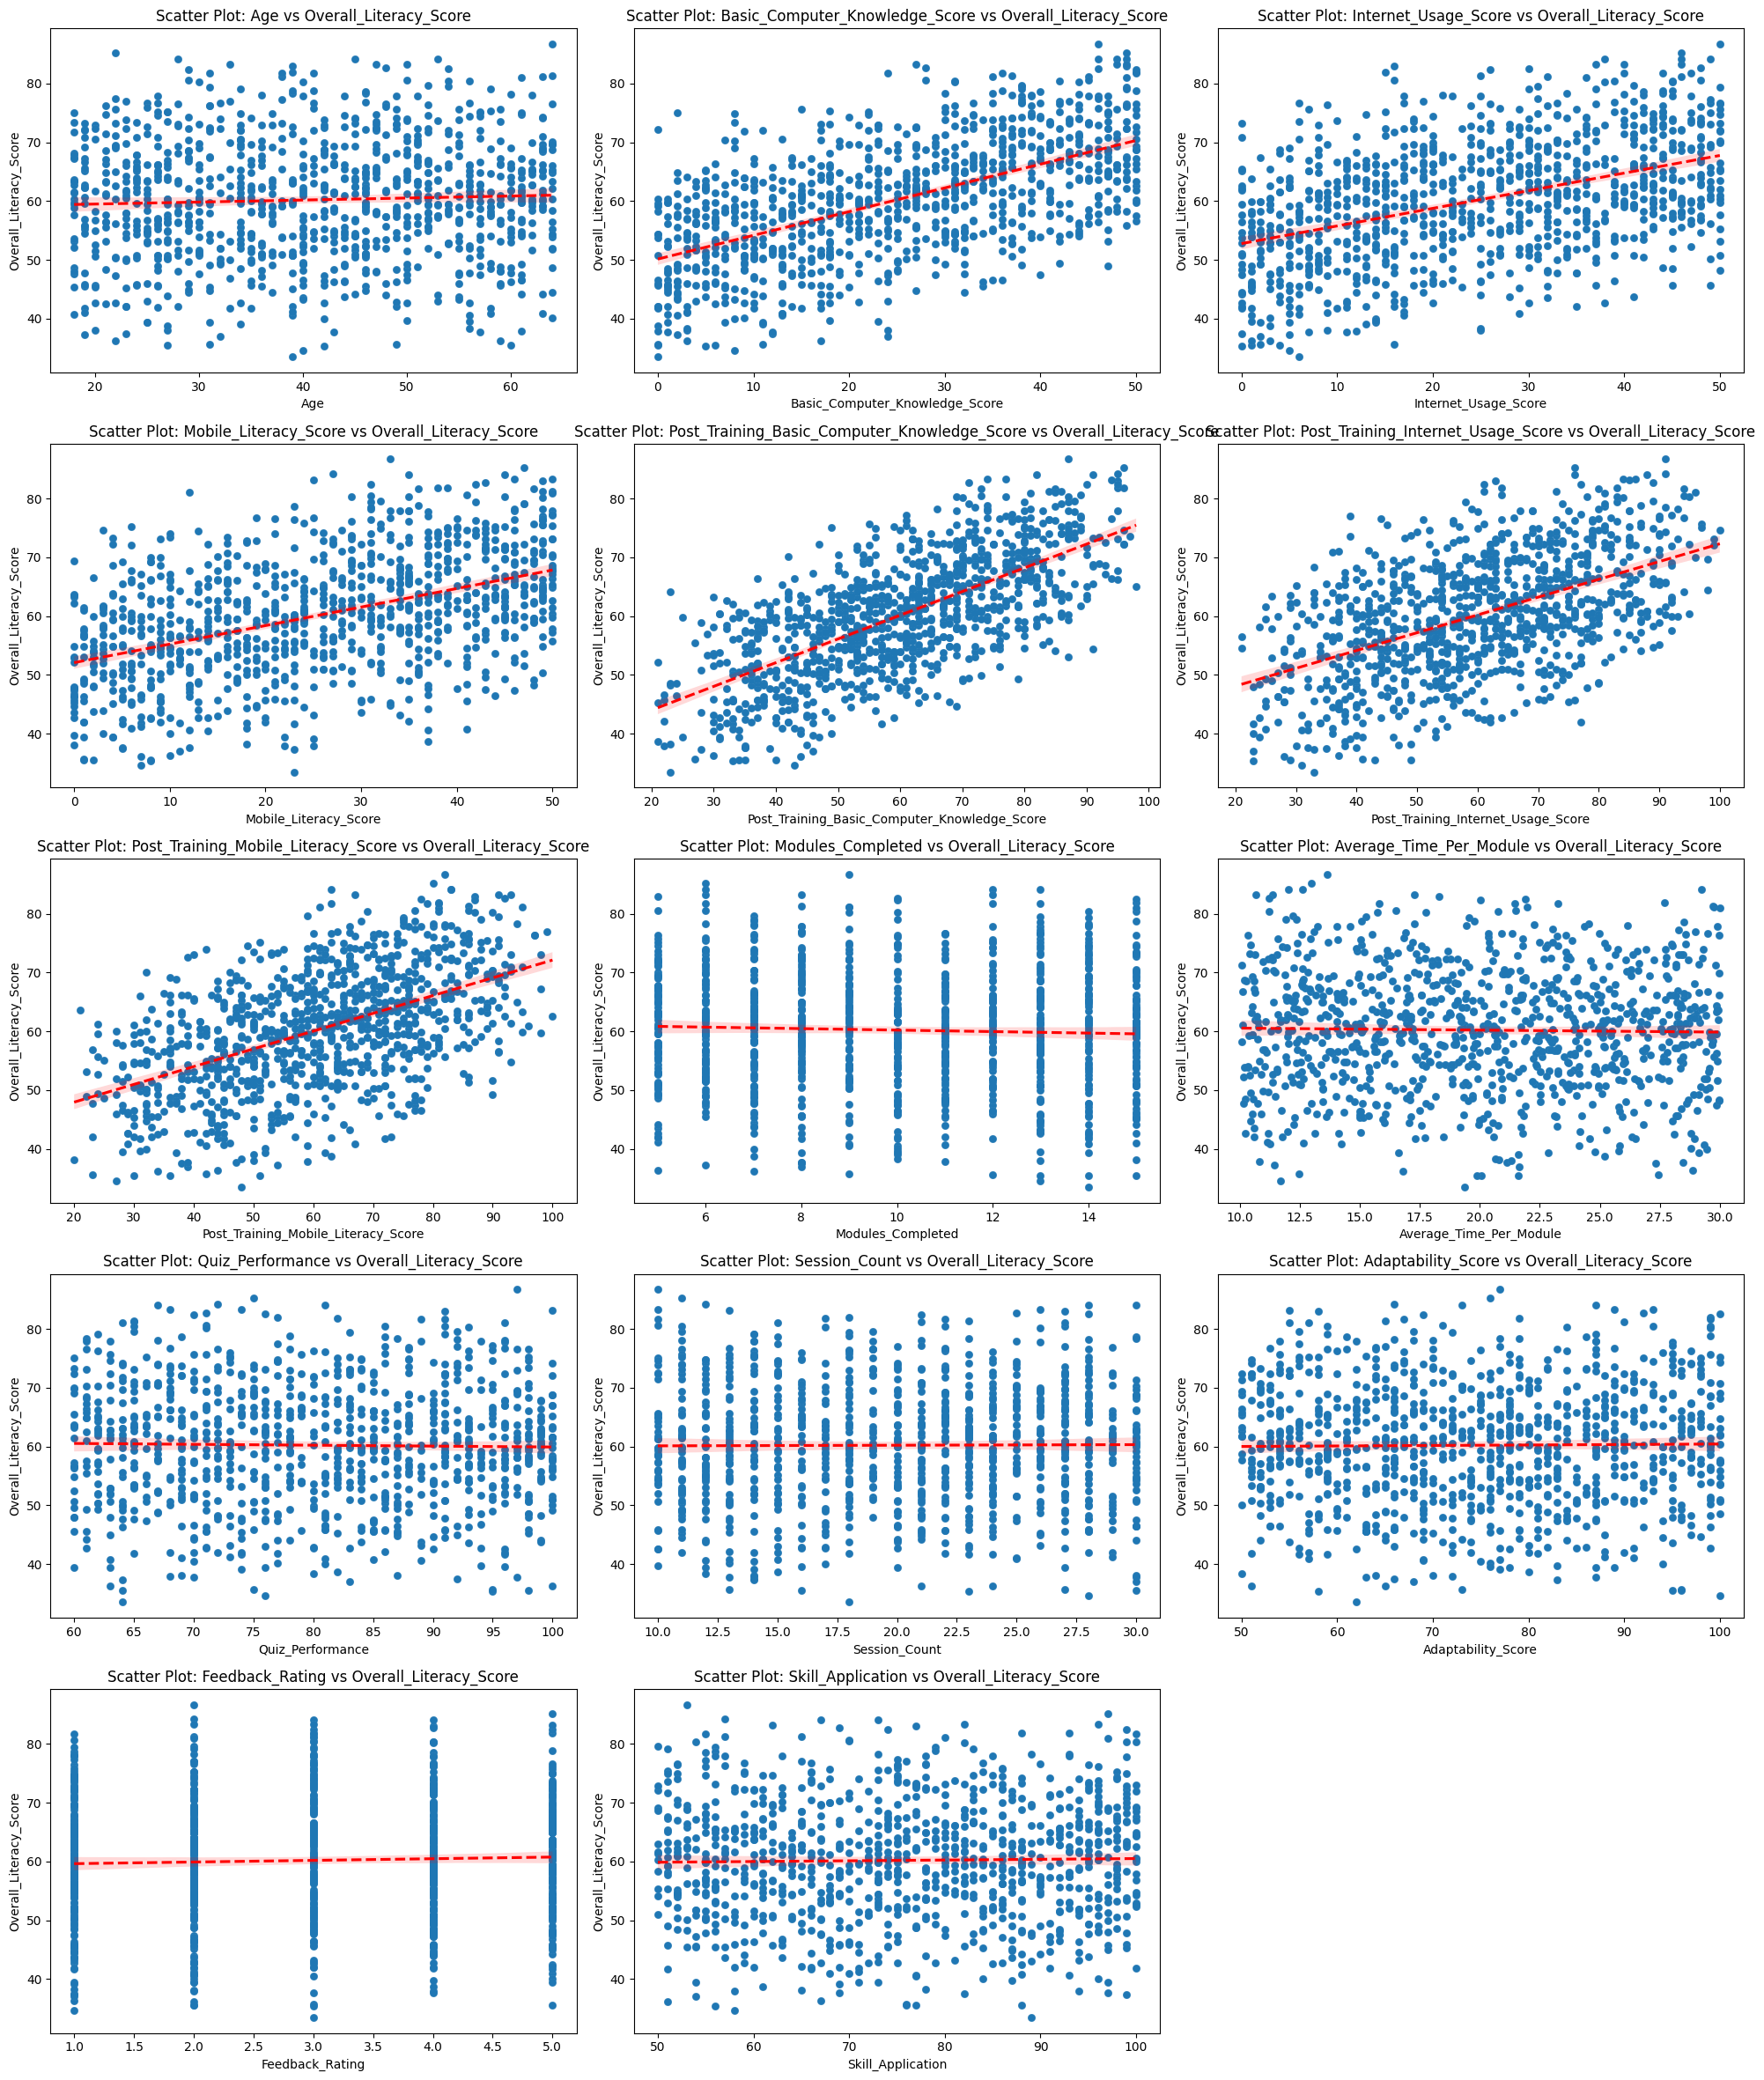

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 28))

for i, col in enumerate(numerical_columns):
    if col != 'Overall_Literacy_Score':
        plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
        sns.scatterplot(data=df, x=col, y='Overall_Literacy_Score')
        sns.regplot(data=df, x=col, y='Overall_Literacy_Score', scatter_kws={'s': 30}, line_kws={'color': 'red', 'linestyle': '--'})
        plt.title(f'Scatter Plot: {col} vs Overall_Literacy_Score')

plt.tight_layout()
plt.show()

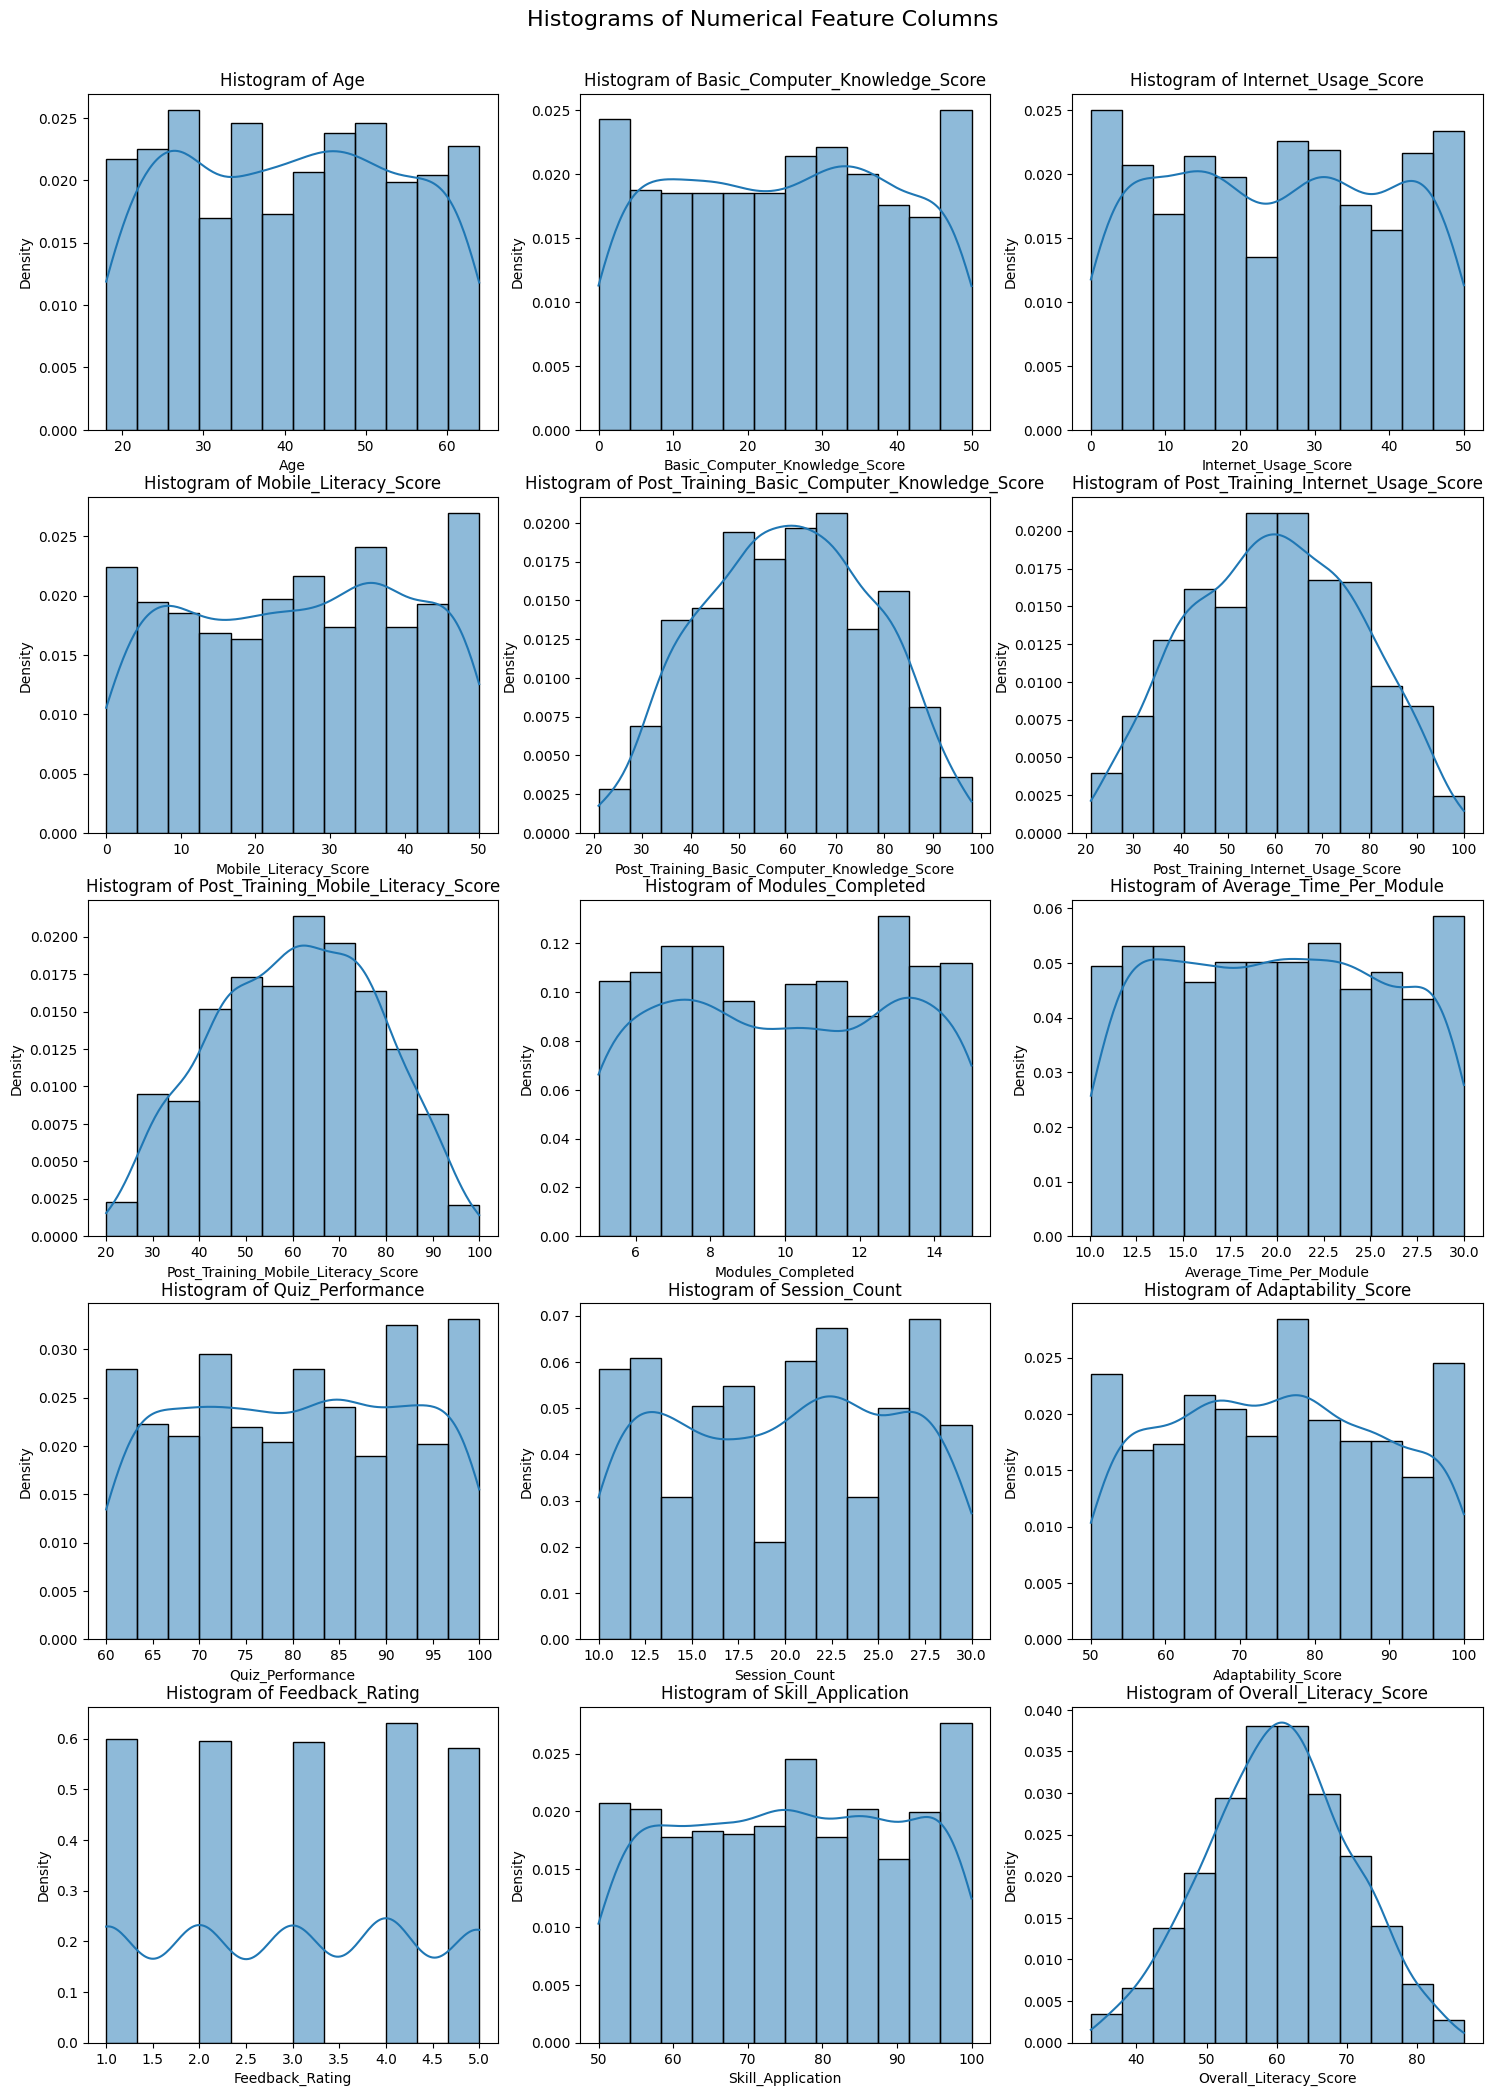

In [ ]:
plt.figure(figsize=(18, 28))

for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(len(df.select_dtypes(include=['number']).columns) // 3 + 1, 3, i+1)
    sns.histplot(df[column], kde=True, bins=12, edgecolor='black', stat='density')
    plt.title(f"Histogram of {column}")

plt.subplots_adjust(top=0.95)

plt.suptitle("Histograms of Numerical Feature Columns", fontsize=16)

plt.show()

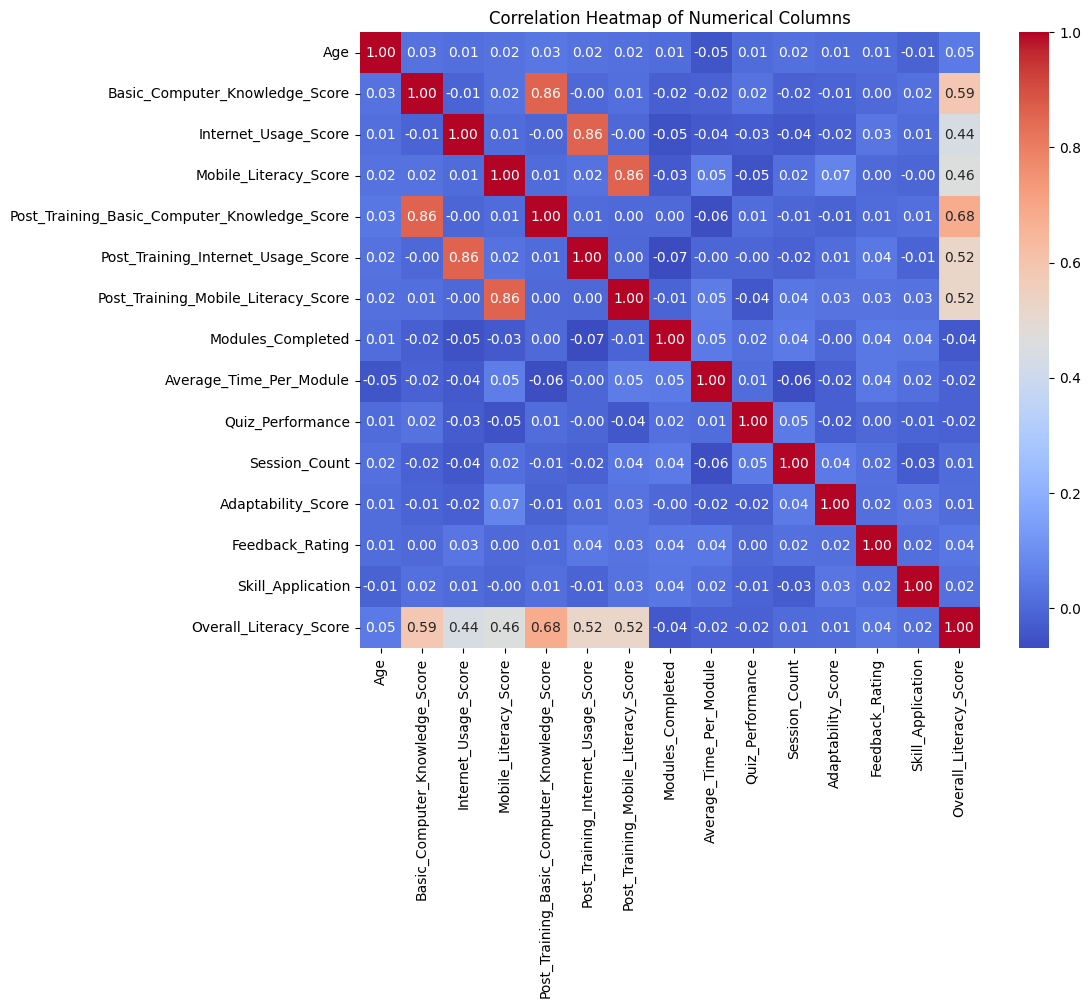

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#Linear Regression From Scratch

In [ ]:
def cost_function(X, Y, W):
    m = len(Y)
    loss = np.sum((X.dot(W)-Y)**2)
    J = loss /(2*m)


    return J

In [ ]:
def gradient_descent(X, y, W, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        y_pred = X.dot(W)

        error = y_pred - y

        gradient = (1 / m) * X.T.dot(error)

        W = W - alpha * gradient

        cost = cost_function(X, y, W)
        cost_history.append(cost)

    return W, cost_history

In [ ]:
def rmse_test(Y, Y_pred):
  return np.sqrt(np.mean((Y - Y_pred) ** 2))


In [ ]:
def r2_test(Y, Y_pred):
  ss_total = np.sum((Y - np.mean(Y)) ** 2)
  ss_residual = np.sum((Y - Y_pred) ** 2)
  return 1 - (ss_residual / ss_total)

##Training of model from Scratch

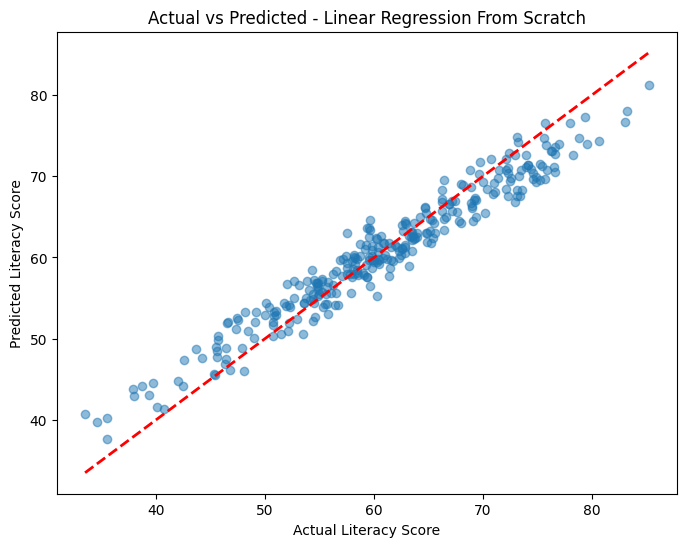

In [ ]:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = le.fit_transform(df[col])

X = df_encoded.drop([ 'Overall_Literacy_Score'], axis=1)
y = df_encoded['Overall_Literacy_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale Features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Add Bias Term
X_train_biased = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_biased = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize Parameters
W = np.random.randn(X_train_biased.shape[1]) * 0.01

# Train Model
alpha = 0.0001
iterations = 10000
W_update, cost_history = gradient_descent(X_train_biased, y_train_scaled, W, alpha, iterations)

# Predictions
y_pred_train_scaled = X_train_biased.dot(W_update)
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()

y_pred_scaled = X_test_biased.dot(W_update)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Literacy Score')
plt.ylabel('Predicted Literacy Score')
plt.title('Actual vs Predicted - Linear Regression From Scratch')
plt.show()


##Prediction

In [ ]:
rmse_train_value = rmse_test(y_train, y_pred_train)
r2_train_value = r2_test(y_train, y_pred_train)

rmse_value = rmse_test(y_test, y_pred)
r2_value = r2_test(y_test, y_pred)

print("Train Results:")
print("RMSE:", rmse_train_value)
print("R-squared:", r2_train_value)

print("\nTest Results:")

print("RMSE:", rmse_value)
print("R-squared:", r2_value)


Train Results:
RMSE: 2.746655609896676
R-squared: 0.9283516676938045

Test Results:
RMSE: 2.75160326351138
R-squared: 0.9238221617050238


#Model 1 - RandomForestRegressor

##Model Fiting

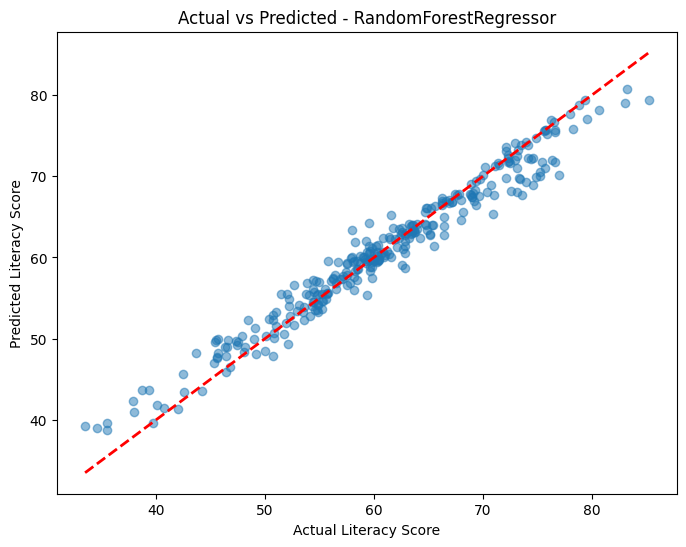

In [ ]:
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_model.fit(X_train, y_train)

y_pred_train = rf_reg_model.predict(X_train)
y_pred = rf_reg_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Literacy Score')
plt.ylabel('Predicted Literacy Score')
plt.title(f'Actual vs Predicted - RandomForestRegressor')
plt.show()

##Model Results

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Train Results:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print("\nTest Results:")

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

Train Results:
RMSE: 0.7918
R2 Score: 0.9940
MAE: 0.5860

Test Results:
RMSE: 2.1215
R2 Score: 0.9547
MAE: 1.5534


#Model 2 - GradientBoostingRegressor

##Model Fitting

Test RMSE: 1.2418


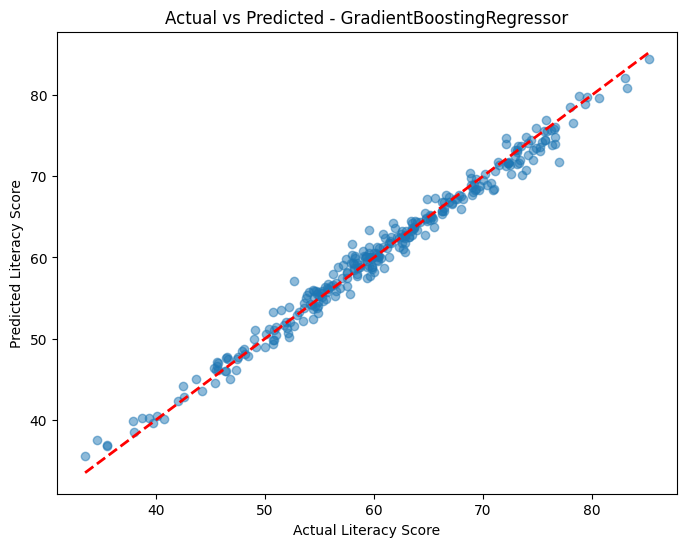

In [ ]:
gbr_reg_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=42
)

# Fit the model to the training data
gbr_reg_model.fit(X_train, y_train)

y_pred_train = gbr_reg_model.predict(X_train)
y_pred = gbr_reg_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Literacy Score')
plt.ylabel('Predicted Literacy Score')
plt.title(f'Actual vs Predicted - GradientBoostingRegressor')
plt.show()

##Model Results

In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Train Results:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print("\nTest Results:")

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")



Train Results:
RMSE: 0.6487
R2 Score: 0.9960
MAE: 0.5139

Test Results:
RMSE: 1.2418
R2 Score: 0.9845
MAE: 0.9487


#Hyper Parameter

##Model 1 -RandomForestRegressor

In [ ]:
param_dist = {
    'n_estimators': np.arange(10, 201, 10),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(1, 21, 1),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'bootstrap': [True, False],
}

rf_reg_model = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(estimator=rf_reg_model,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

random_search_rf.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best cross-validation score: {random_search_rf.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 16, 'bootstrap': True}
Best cross-validation score: 0.9478261816804266


In [ ]:
y_pred = random_search_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 16, 'bootstrap': True}
Mean Squared Error: 4.539323017695847
R-squared: 0.9543282028666034


##Model 2 - GradientBoostingRegressor

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

gbr_reg_model = GradientBoostingRegressor(random_state=42)

random_search_gb = RandomizedSearchCV(
    estimator=gbr_reg_model,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    n_jobs=-1,
    verbose=1
)

random_search_gb.fit(X_train, y_train)

print(f"Best Parameters: {random_search_gb.best_params_}")
print(f"Best Cross-Validation Score: {random_search_gb.best_score_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Best Cross-Validation Score: 0.982657715279137


In [ ]:
y_pred = random_search_gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {random_search_gb.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.05}
Mean Squared Error: 1.2426784676595992
R-squared: 0.9874969552385372


#Feature Selection

##Model 1 - RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold="mean", max_features=5)
selector.fit(X_train, y_train)

selected_features_rf = X_train.columns[selector.get_support()]

print("Selected features:", selected_features_rf)

Selected features: Index(['Post_Training_Basic_Computer_Knowledge_Score',
       'Post_Training_Internet_Usage_Score',
       'Post_Training_Mobile_Literacy_Score'],
      dtype='object')


##Model 2 - GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

selector = SelectFromModel(gb, threshold="mean", max_features=5)
selector.fit(X_train, y_train)

selected_features_gb = X_train.columns[selector.get_support()]

print("Selected features:", selected_features_gb)

Selected features: Index(['Post_Training_Basic_Computer_Knowledge_Score',
       'Post_Training_Internet_Usage_Score',
       'Post_Training_Mobile_Literacy_Score'],
      dtype='object')


#Final Model - GradientBoostingRegressor

Train Results:
RMSE: 0.6092
R2 Score: 0.9965
MAE: 0.4837

Test Results:
RMSE: 1.0427
R2 Score: 0.9891
MAE: 0.7948


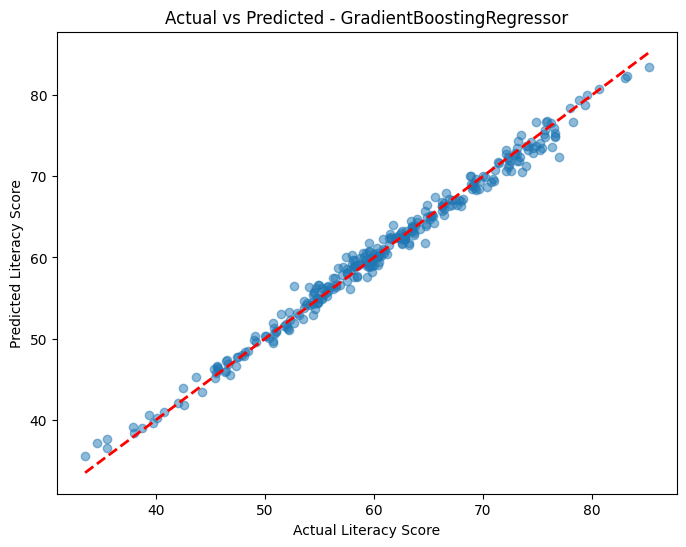

In [ ]:
best_params = random_search_gb.best_params_

final_gb_reg_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=42
)

X_train_selected = X_train[selected_features_gb]
X_test_selected = X_test[selected_features_gb]

final_gb_reg_model.fit(X_train_selected, y_train)

y_pred_train = final_gb_reg_model.predict(X_train_selected)
y_pred = final_gb_reg_model.predict(X_test_selected)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Train Results:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2 Score: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print("\nTest Results:")

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")


# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Literacy Score')
plt.ylabel('Predicted Literacy Score')
plt.title(f'Actual vs Predicted - GradientBoostingRegressor')
plt.show()